In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras

In [2]:
#------------------READ DATA------------------#
def load_dataset():
    train_data = np.load('/kaggle/input/praproses-kinship/data_array.npy')
    print(train_data.shape)
    train_label = np.load('/kaggle/input/data-path-label/data_label.npy')
    train_data = train_data.astype(np.float16)
    train_data = train_data/255
    classes = 2
    temp = np.array(train_label).reshape(-1)
    train_label = np.eye(classes)[temp]
    del temp
    print(train_data.shape, train_label.shape)
    x_train, x_test, y_train, y_test = train_test_split(train_data,
                                                        train_label,
                                                        test_size=0.2,
                                                        random_state=42,
                                                        shuffle=True)
    del train_data
    del train_label
    print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
    return x_train, x_test, y_train, y_test
x_train, x_test, y_train, y_test = load_dataset()
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(6123, 16, 64, 128)
(6123, 16, 64, 128) (6123, 2)
(4898, 16, 64, 128) (1225, 16, 64, 128) (4898, 2) (1225, 2)
(4898, 16, 64, 128) (1225, 16, 64, 128) (4898, 2) (1225, 2)


In [3]:
# Build model.
model = keras.models.load_model('/kaggle/input/3d-resnet18-1664128/3d_resnet18_64x128.h5')
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 16, 64, 128, 0                                            
__________________________________________________________________________________________________
conv3d (Conv3D)                 (None, 8, 32, 64, 64 22016       input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 8, 32, 64, 64 256         conv3d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 8, 32, 64, 64 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [4]:
# Compile model.
import math
def step_decay(epoch):
   initial_lrate = 0.1
   drop = 0.1
   epochs_drop = 10.0
   lrate = initial_lrate * math.pow(drop,
                                    math.floor((1+epoch)/epochs_drop))
   return lrate

lr_schedule = keras.callbacks.LearningRateScheduler(step_decay)

model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.RMSprop(learning_rate = 0.001),
              metrics='acc')

# Define callbacks.
checkpoint_cb = keras.callbacks.ModelCheckpoint('3d_training.h5',
                                                save_best_only=True)

early_stopping_cb = keras.callbacks.EarlyStopping(monitor="val_acc", patience=15)

# Train the model, doing validation at the end of each epoch
epochs = 30
model.fit(x_train,y_train,
    epochs=epochs,
    batch_size=25,
    shuffle=True,
    verbose=1,
    callbacks=[checkpoint_cb],
    validation_split=0.1)

Epoch 1/30
177/177 [==============================] - 32s 120ms/step - loss: 1.0298 - acc: 0.5923 - val_loss: 1.2573 - val_acc: 0.5837


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/30
177/177 [==============================] - 19s 109ms/step - loss: 0.6839 - acc: 0.7954 - val_loss: 1.0053 - val_acc: 0.6449
Epoch 3/30
177/177 [==============================] - 19s 110ms/step - loss: 0.5068 - acc: 0.8968 - val_loss: 0.6443 - val_acc: 0.8265
Epoch 4/30
177/177 [==============================] - 19s 110ms/step - loss: 0.4130 - acc: 0.9331 - val_loss: 0.7453 - val_acc: 0.7837
Epoch 5/30
177/177 [==============================] - 19s 109ms/step - loss: 0.3704 - acc: 0.9465 - val_loss: 0.3097 - val_acc: 0.9673
Epoch 6/30
177/177 [==============================] - 19s 110ms/step - loss: 0.3290 - acc: 0.9505 - val_loss: 0.2621 - val_acc: 0.9633
Epoch 7/30
177/177 [==============================] - 19s 110ms/step - loss: 0.3026 - acc: 0.9555 - val_loss: 0.3117 - val_acc: 0.9490
Epoch 8/30
177/177 [==============================] - 19s 109ms/step - loss: 0.2823 - acc: 0.9589 - val_loss: 0.3370 - val_acc: 0.9245
Epoch 9/30
177/177 [==============================] - 1

In [5]:
acc = model.history.history['acc']
val_acc = model.history.history['val_acc']
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
#lr = model.history.history['lr']
np.array(val_acc).shape, np.array(acc).shape, np.array(loss).shape, np.array(val_loss).shape

((30,), (30,), (30,), (30,))

In [6]:
np.save('data_x_test',x_test)
np.save('data_y_test',y_test)
np.save('3d_acc', acc)
np.save('3d_val_acc', val_acc)
np.save('3d_loss', loss)
np.save('3d_val_loss', val_loss)

In [7]:
#plt.plot(lr, color='black')
#plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
#plt.xlabel('+1 Epochs')
#plt.ylabel('Accuracy')
#plt.show()

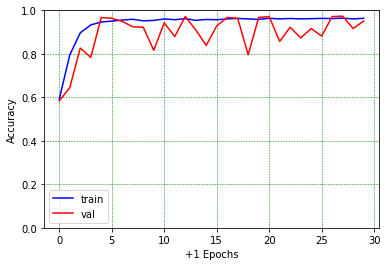

In [8]:
plt.plot(acc, color='blue')
plt.plot(val_acc, color='red')
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.xlabel('+1 Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'])
plt.ylim(0, 1)
plt.show()

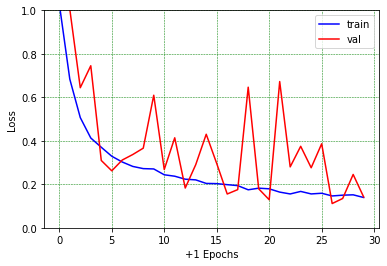

In [9]:
plt.plot(loss, color='blue')
plt.plot(val_loss, color='red')
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.xlabel('+1 Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'val'])
plt.ylim(0, 1)
plt.show()

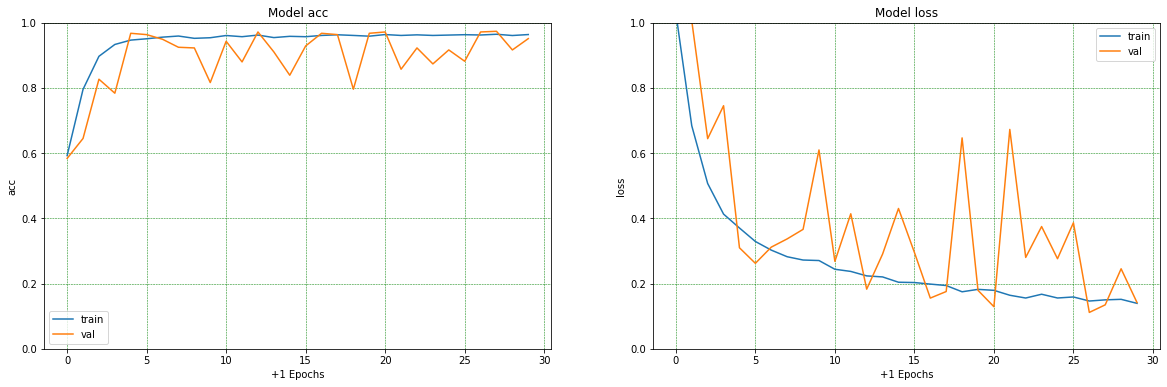

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
ax = ax.ravel()

for i, metric in enumerate(['acc', 'loss']):
    ax[i].plot(model.history.history[metric])
    ax[i].plot(model.history.history['val_' + metric])
    ax[i].grid(color = 'green', linestyle = '--', linewidth = 0.5)
    ax[i].set_title('Model {}'.format(metric))
    ax[i].set_xlabel('+1 Epochs')
    ax[i].set_ylabel(metric)
    ax[i].legend(['train', 'val'])
    ax[i].set_ylim(0, 1)

In [11]:
loss, acc = model.evaluate(x_test, y_test)
print('Akurasi:', acc)

39/39 [==============================] - 2s 52ms/step - loss: 0.1487 - acc: 0.9494
Akurasi: 0.9493877291679382
